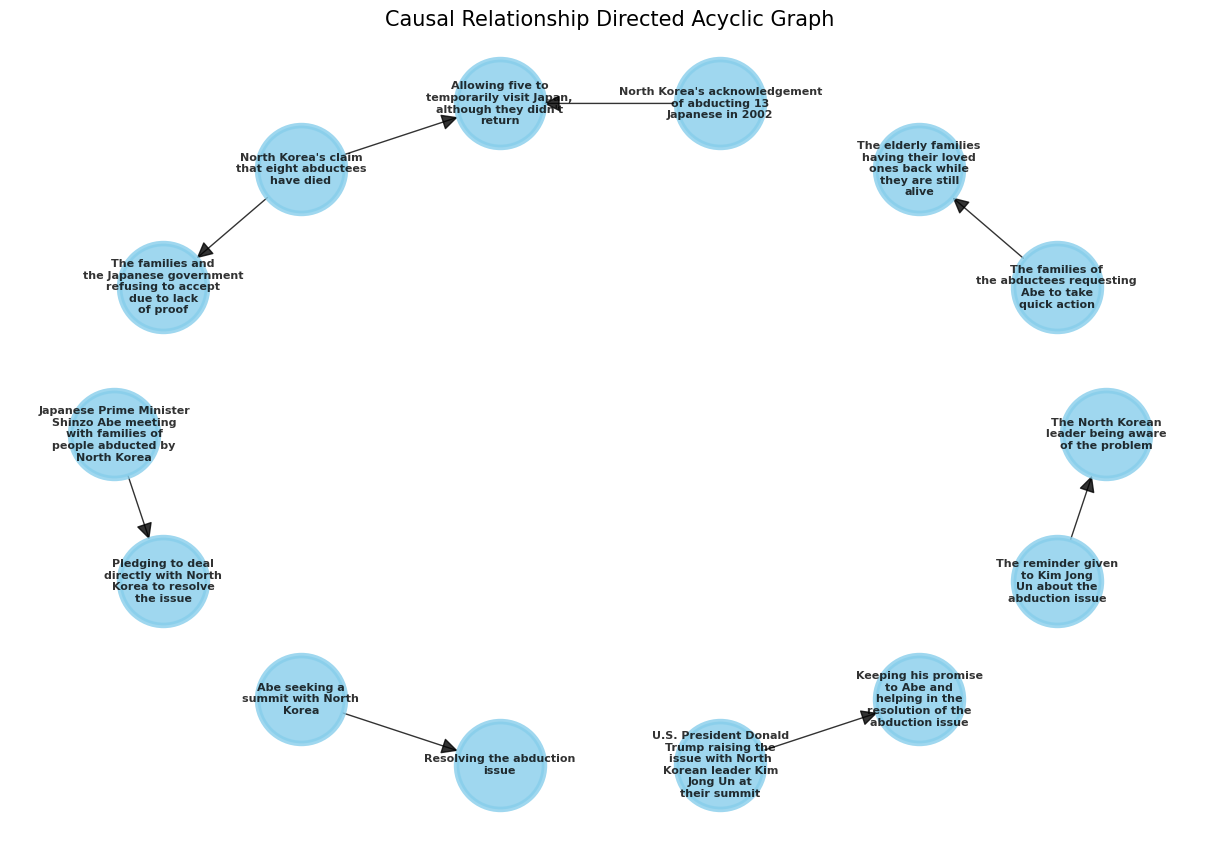

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

# Process the plain text
text = """
1. [cause] Japanese Prime Minister Shinzo Abe meeting with families of people abducted by North Korea -> [effect] Pledging to deal directly with North Korea to resolve the issue
2. [cause] Abe seeking a summit with North Korea -> [effect] Resolving the abduction issue
3. [cause] U.S. President Donald Trump raising the issue with North Korean leader Kim Jong Un at their summit -> [effect] Keeping his promise to Abe and helping in the resolution of the abduction issue
4. [cause] The reminder given to Kim Jong Un about the abduction issue -> [effect] The North Korean leader being aware of the problem
5. [cause] The families of the abductees requesting Abe to take quick action -> [effect] The elderly families having their loved ones back while they are still alive
6. [cause] North Korea's acknowledgement of abducting 13 Japanese in 2002 -> [effect] Allowing five to temporarily visit Japan, although they didn't return
7. [cause] North Korea's claim that eight abductees have died -> [effect] The families and the Japanese government refusing to accept due to lack of proof
8. [cause] North Korea's claim that eight abductees have died -> [effect] Allowing five to temporarily visit Japan, although they didn't return
"""


def split_text(text, words=6):
    words_list = text.split()
    lines = [' '.join(words_list[i:i + words]) for i in range(0, len(words_list), words)]
    return '\n'.join(lines)

causal_relationships = []
for line in text.split("\n"):
    line = line.strip()
    if line:
        parts = line.split("->")
        if len(parts) == 2:
            cause = parts[0].split("[cause]")[1].strip()
            effect = parts[1].split("[effect]")[1].strip()
            cause = split_text(cause, words=3)
            effect = split_text(effect, words=3)
            causal_relationships.append((cause, effect))

# Create a directed acyclic graph
G = nx.DiGraph()

# Add edges to the graph
for cause, effect in causal_relationships:
    G.add_edge(cause, effect)

# Draw the graph with shell_layout algorithm
plt.figure(figsize=(12, 8))
pos = nx.shell_layout(G)
nx.draw(G, pos, with_labels=True, node_size=4000, node_color="skyblue", node_shape="o", alpha=0.8, linewidths=4, font_size=8, font_weight="bold", font_color="black", arrowsize=25)
plt.title("Causal Relationship Directed Acyclic Graph", fontsize=15)
plt.show()